<a href="https://colab.research.google.com/github/pratyaksh12/Binary-Classification-with-PyTorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
What_to_cover = {
    1: "Data (prepare and load)",
    2: "Build model",
    3: "fitting the model to the data",
    4: "making predictions and evaluating the model(inference)",
    5: "saving and loading the model",
    6: "combining everything"
}
What_to_cover

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'fitting the model to the data',
 4: 'making predictions and evaluating the model(inference)',
 5: 'saving and loading the model',
 6: 'combining everything'}

In [ ]:
import torch
from torch import nn  ##contains all the building blocks for making a nn
import matplotlib.pyplot as plt

print(torch.__version__)

2.5.1+cu121


##Data Preparing and loading
- data can be anything in machiine learning (pictures, dna, tables, text, sound, etc.)
- Machine Learning is a game of two parts:
  - Get data into numerical representation
  - Build a model to learn a pattern in that numerical representation

##creating some known data with linear regression
using linear regression formula to make a parameter with known parameters

In [ ]:
#creating known parameters

weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
print(X[:10])
print('\n')
print(y[:10])



tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])


tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
train_split = int(0.8 * len(X))
X_manual, y_manual = X[:train_split], y[:train_split]
X_test_manual, y_test_manual = X[train_split:], y[train_split:]

X_manual.size()

torch.Size([40, 1])

###Splitting data into training and tests one of the most important topic in machine learning

In [ ]:
#using skleran for splitting of data,  can be done manually as well
from sklearn.model_selection import train_test_split

x_arr = torch.Tensor.numpy(X)
y_arr = torch.Tensor.numpy(y)

x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.2, random_state=42)
X_train = torch.from_numpy(x_train)
X_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

##Visualisation of data
visualise, visualise, visualise

In [ ]:
def plot_predictions(train_data = X_train, train_label = y_train, test_data = X_test, test_label = y_test, predictions = None):
  #plot training and test data
  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_label, c = 'b', s = 4, label = 'training data')
  plt.scatter(test_data, test_label, c = 'g', s = 4, label = 'test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'predictions')

  plt.legend(prop = {'size':14})

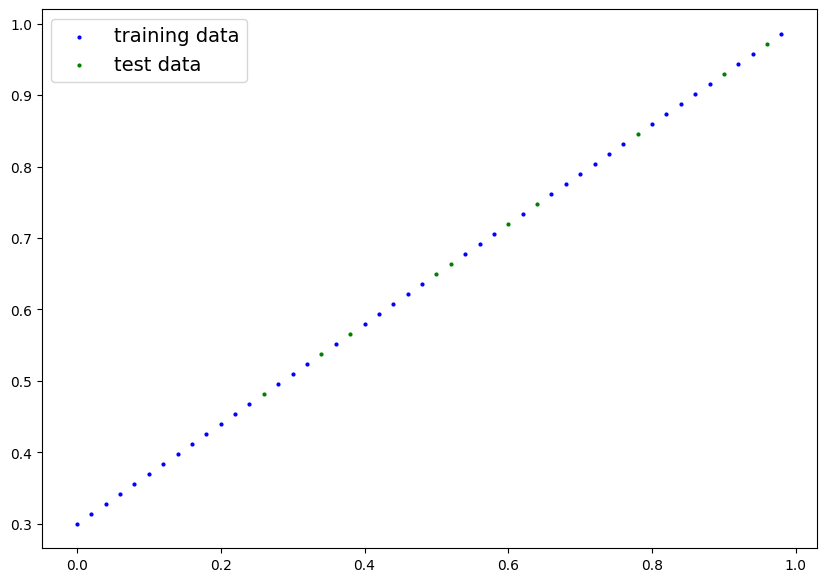

In [ ]:
plot_predictions()

#building the first pytorch model



In [ ]:
import torch
from torch import nn


#creating a linear regression model class

class LinearRegressionModel(nn.Module): ##inheriting from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float32))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float32))


    #forward pass for computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #'x' is the input data
    return self.weights * x + self.bias


###python model building modules

- torch.nn contains all the basic computational graph for building a nn
- torch.nn.parameters: what parameters should our models try and learn, often a layer from torch.nn  will set these for us
- torch.nn.Module: The base class for all neural network module, if you subclass it you sould overwrite the forward()
- torch.optim: This is where the optimiser in the PTorch live and they will help with the gradient descent
- def forward(): all nn.Module require you to overwrite forward(), this method defines what happens in the forward computation

###Checking the content of the PyTorch Model

since we have created a model lets check what is inside it

we can do that using `.parameters()`

In [ ]:
torch.manual_seed(42)

#create an instance of a model

model_0 = LinearRegressionModel()

#list out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### making predictions using torch.inference_mode()

To check our model's predictive power, let's see how model predicts y_pred based on X_test

In [ ]:
with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])

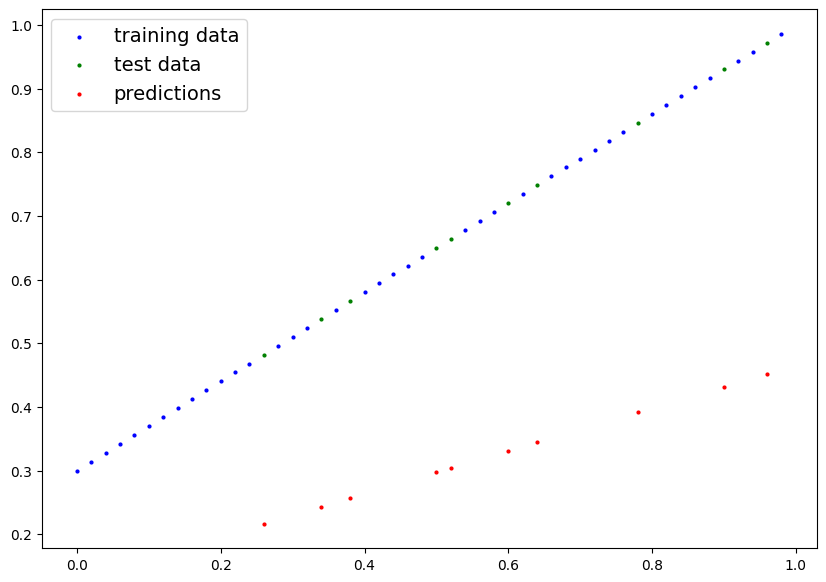

In [ ]:
plot_predictions(predictions = y_pred)
#data is way off from where it is expected to be

In [ ]:
# no_grad is useful for making the predictions faster
%%time
with torch.no_grad():
  y_pred = model_0(X_test)
print(y_pred)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])
CPU times: user 2.33 ms, sys: 0 ns, total: 2.33 ms
Wall time: 4.5 ms


In [ ]:
# inference_mode() is useful for making the predictions even more faster
%%time
with torch.inference_mode():
  y_pred = model_0(X_test)
print(y_pred)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568]])
CPU times: user 3.03 ms, sys: 0 ns, total: 3.03 ms
Wall time: 5.82 ms


#Train the model

the idea is to moe the model from some *unknow* (random parameters) to some *known* parameters
basically from a poor representation to a better representation

one way to measurte the performance of the model is to use a loss function

Things we need to traing the model:
* **loss function** something to calculate the loss or how much the data is off by
* **optimiser** something for the parameters to be adjusted so that the data can be modified for better predictions

in pytorch we need a :
⚫ training loop  and a testing loop


`params` what all parameters you wnat the model to update

`lr` how significant you want the learning rate to be or how big of a step you want to take to adjust the value

In [ ]:
#using mean absolute error for calculation of loss
loss_func = nn.L1Loss()
loss_func

#using stochastic gradient descent or SGD for optimisation of the tensors

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Building a trainnig and a testing loop in PyTorch

there are 2 steps:

0. Loop through the data
1. forward pass (this  nvolves data moving forward)
2. Calculate the loss (compare the forward pass predictions to ground truth trables)
3. Optimizer zero grad
4. Loss Backward - move backward int he network to calculate the gradients of the paameters with repect to the loss (**Backward propagation**)
5. Optimizer step - use the optimizer to adjust the model parameters and improve the overall loss (**Gradient descent**)

In [ ]:
# an Epoch is one loop through the data

epoch = 200

#tracking the values
epoch_count = []
loss_values = []
test_loss_values = []

#0. loop through the data
for epoch in range(epoch):
  #set the model to taining mode
  model_0.train() # train mode sets all the parameters that require the gradients to require gradients

  #forward Pass
  y_pred = model_0(X_test) # get the predictions

  #Calculate the loss
  loss = loss_func(y_pred, y_test) # check how off the predictions are


  #optimizer zero_grad
  optimizer.zero_grad() # clear the gradient to prevent accumulation of grads

  #perform back propagation on the parameters with respect to the parameters of the model
  loss.backward() #calculate the gradient of the parameters with respect to the loss

  #step the optimizer (perform gradient descent)
  optimizer.step()# update the parameters with respect to the calculated gradient

 ##testing
  model_0.eval() # turn off gradient tracking (drop out or batch norm)

  with torch.inference_mode():
    test_pred = model_0(X_test)

    loss_test = loss_func(test_pred, y_test)
  if epoch % 1 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(loss_test)
    print(f"epoch: {epoch} | Loss: {loss} | loss in test: {loss_test}")




epoch: 0 | Loss: 0.1156686320900917 | loss in test: 0.11432290077209473
epoch: 1 | Loss: 0.11432290077209473 | loss in test: 0.11297718435525894
epoch: 2 | Loss: 0.11297718435525894 | loss in test: 0.11163143813610077
epoch: 3 | Loss: 0.11163143813610077 | loss in test: 0.11028573662042618
epoch: 4 | Loss: 0.11028573662042618 | loss in test: 0.108939990401268
epoch: 5 | Loss: 0.108939990401268 | loss in test: 0.10759426653385162
epoch: 6 | Loss: 0.10759426653385162 | loss in test: 0.10624852031469345
epoch: 7 | Loss: 0.10624852031469345 | loss in test: 0.10490278899669647
epoch: 8 | Loss: 0.10490278899669647 | loss in test: 0.10355707257986069
epoch: 9 | Loss: 0.10355707257986069 | loss in test: 0.10221131891012192
epoch: 10 | Loss: 0.10221131891012192 | loss in test: 0.10086560249328613
epoch: 11 | Loss: 0.10086560249328613 | loss in test: 0.09951987862586975
epoch: 12 | Loss: 0.09951987862586975 | loss in test: 0.09817413985729218
epoch: 13 | Loss: 0.09817413985729218 | loss in test:

In [ ]:
#initial values of the parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.4543])), ('bias', tensor([0.3288]))])

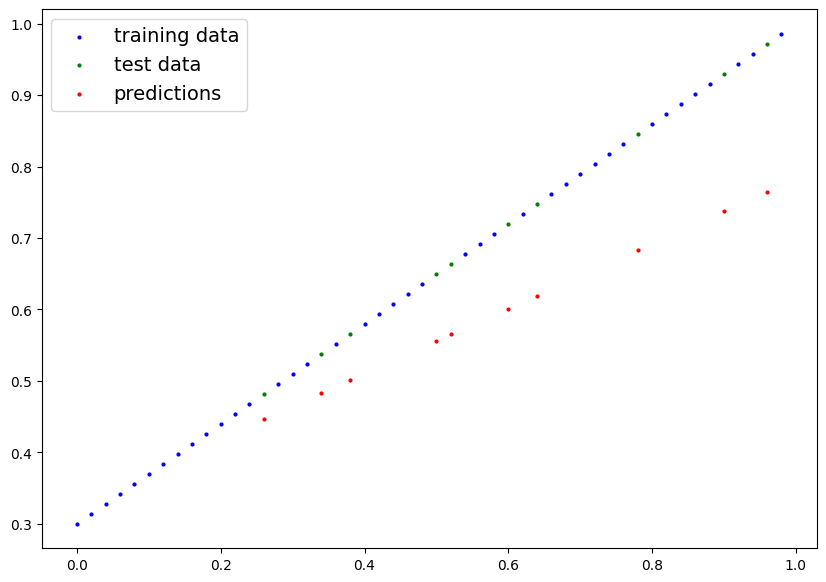

In [ ]:
with torch.inference_mode():
  predictions = model_0(X_test)

plot_predictions(predictions = predictions)

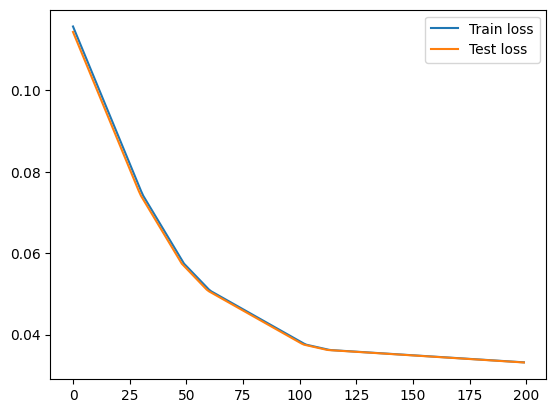

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.Tensor.numpy(torch.tensor(loss_values))), label = 'Train loss')
plt.plot(epoch_count, np.array(torch.Tensor.numpy(torch.tensor(test_loss_values))), label = 'Test loss')
plt.legend()

##Saving a model in pytorch

Three ways for saving and loading model in PyTorch

`torch.save()` saves in the form of python's pikle format

`torch.load()` allows you to load the saved model

`torch.nn.Modeule.load_state_dict()` allows us to load model's saved state dictionary

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5236])), ('bias', tensor([0.4004]))])

In [ ]:
#lets save the current state dict of the model
from pathlib import Path

#create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

#model save path
MODEL_NAME = "LinearRegression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#save the model's state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/LinearRegression.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1550 Jan  4 04:40 LinearRegression.pth


## loading the state dict of the model

since we have stored the state dict of the model we need to initialise the model and put the state_dict onto the model

In [ ]:
#to load in a saved state dict we need to instantiate our model class

loaded_model_0 = LinearRegressionModel()

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f = "models/LinearRegression.pth"))

<ipython-input-71-0ed83b70ae63>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f = "models/LinearRegression.pth"))


<All keys matched successfully>

In [ ]:
y_preds = model_0(X_test)

In [ ]:
##checking if the model loaded successfully
loaded_model_0.eval()
with torch.inference_mode():
  loaded_pred = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])